In [1]:
import ROOT
import pandas
#import matplotlib.mlab as mlab
import math
#matplotlib.use('agg')
%matplotlib inline
import matplotlib #as matplot
print(matplotlib.__version__)
#print(matplotlib.path)
#matplotlib.use('PS')   # generate postscript output by default
import matplotlib.pyplot as plt

from matplotlib import cm as cm
import numpy as np
from sklearn.metrics import roc_curve, auc
import pylab
### <module 'matplotlib.path' from '/home/acaan/.local/lib/python2.7/site-packages/matplotlib/path.pyc'>

import sklearn as sk
print(sk.__version__)
from sklearn.model_selection import train_test_split

Welcome to JupyROOT 6.12/07
2.2.3
0.20.1


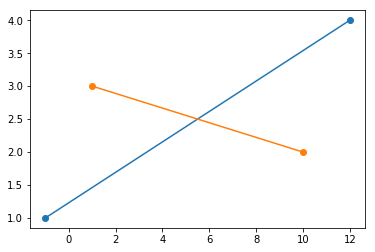

In [2]:
## test matplotlib import before spend time on anything else
x1, y1 = [-1, 12], [1, 4]
x2, y2 = [1, 10], [3, 2]
plt.plot(x1, y1, x2, y2, marker = 'o')
plt.show()

In [3]:
import time
import tensorflow as tf
print(tf.__version__)
######################
import keras as kr
from keras.models import Sequential
from keras.layers import InputLayer, Input
from keras.layers import Reshape, MaxPooling2D
from keras.layers import Conv2D, Dense, Flatten, AlphaDropout, Dropout, BatchNormalization, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.optimizers import Adamax
from keras.optimizers import Nadam
from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU, ELU, PReLU # del better with zero activation -> avoid nan
from sklearn.preprocessing import StandardScaler
print(kr.__version__)
from keras import backend as K


import tensorflow as tf
print(tf.__version__)
config = tf.ConfigProto(intra_op_parallelism_threads=32, \
                        inter_op_parallelism_threads=32, \
                        allow_soft_placement=True, \
                        device_count = {'CPU': 32}
                       )
session = tf.Session(config=config)
K.set_session(session)
## it will issue a warning, just ignore

1.6.0
2.1.4
1.6.0


Using TensorFlow backend.
2019-04-15 15:19:06.677638: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA


In [17]:
## how to consider the channels
channel = "1l_2tau"

if channel == "2lss_0tau" :
    read_condition = "(pass_2lss_0tau)" 
    tHenrich = True
    if tHenrich == False:
        read_condition += " & (pass_ttH)"
        #              ['ttHToNonbb','TTWJets','TTZJets','TT', tHq, tWq]
        norm_2lss_0tau = [66., 156., 96., 139, 1.7, 1.6]
        norm_ttWctrl =   [17., 78., 42., 120.0, 1.5, 0.79]
    else : 
        norm_2lss_0tau = [72., 190., 114., 257., 3.4, 1.9]
        norm_ttWctrl =   [17., 78., 42., 120.0, 1.6, 0.7]
    channels = ["pass_2lss_0tau"]
    norms =    [norm_2lss_0tau]
    CRs =      ["pass_ttWctrl"]
    normsCRs = [norm_ttWctrl]
    ## This above says to consider the ttWctrl ("ttW-sel" toguether in the classic 2lss)
    ## ~ 20 min to load, ~1min per epoch

if channel == "3l_0tau" :
    read_condition = "(pass_3l_0tau)" 
    tHenrich = True
    if tHenrich == False:
        read_condition += " & (pass_ttH)"
        #              ['ttHToNonbb','TTWJets','TTZJets','TT', tHq, tWq]
        norm_3l_0tau =   [24., 37., 37., 28.5, 0.66, 0.76]
    else : 
        norm_3l_0tau =   [25., 40., 39., 48., 0.66, 0.75]
    channels = ["pass_3l_0tau"]
    norms =    [norm_3l_0tau]
    CRs =      channels
    normsCRs = norms
    ## If you would like to consider the ttZcrl (Z-peak) in the training altogueter you would just have to add "ttZctrl" as CR, as the example above
    ## ~ 10 min to load, ~30min per epoch    
    
if channel == "1l_2tau" :
    read_condition = "(pass_1l_2tau)" 
    tHenrich = False
    if tHenrich == False:
        read_condition += " & (pass_ttH)"
        #              ['ttHToNonbb','TTWJets','TTZJets','TT', tHq, tWq]
        norm_1l_2tau = [8.57, 0.75, 6.68, 274.26, 0.22, 0.25] ## not tH enriched
    else : 
        #              ['ttHToNonbb','TTWJets','TTZJets','TT', tHq, tWq]
        norm_1l_2tau = [9.47, 1.17, 7.53, 467.83, 0.40, 0.31] ## tH-enriched
    channels = ["pass_1l_2tau"]
    norms =    [norm_1l_2tau]
    CRs =      channels
    normsCRs = norms
    ## ~10 min to load data | ~5s per epoch

if channel == "2lss_1tau" :
    read_condition = "(pass_2lss_1tau)" 
    tHenrich = True
    if tHenrich == False:
        read_condition += " & (pass_ttH)"
        #              ['ttHToNonbb','TTWJets','TTZJets','TT', tHq, tWq]
        norm_2lss_1tau = [9.37, 8.52, 9.95, 5.44, 0.21, 0.25]
    else : 
        #              ['ttHToNonbb','TTWJets','TTZJets','TT', tHq, tWq]
        norm_2lss_1tau = [10.27,11.34,11.19,9.84,0.35,0.28]
    channels = ["pass_2lss_1tau"]
    norms =    [norm_2lss_1tau]
    CRs =      channels
    normsCRs = norms
    ## ~10 min to load data | ~5s per epoch

if channel == "4Lep" :
    read_condition = "(pass_2l_2tau) | (pass_3l_1tau) | (pass_4l_0tau)"
    tHenrich = True
    channels = ["pass_2l_2tau", "pass_3l_1tau", "pass_4l_0tau"]
    CRs =      channels
    normsCRs = norms
## In the way it is constructed if you add more than one entry on the list of channels
# it will train on the sum of these but evaluate on each channel
# the channel and CR correspondence will follow the order entered on the channels/CRs arrays

print ("Date: ", time.asctime( time.localtime(time.time()) ))

('Date: ', 'Mon Apr 15 15:31:01 2019')


In [5]:
## the loading functions
%run ../python/data_manager.py 
## It will issue a warning, just ignore
tree = "inclusive"
%run ../cards/info_inclusive_NN.py 
## take the list of variables to load from the tree from the above script and tree structure -- check it out
print ("Date: ", time.asctime( time.localtime(time.time()) ))
## the location of the trees
inputPath = "/home/acaan/inclusive_toNN_2019mar28/forBDTtraining/"

/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-root_numpy/4.7.3-ikaegh4/lib/python2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.16.2 is currently installed but you installed root_numpy against numpy 1.15.1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


('Date: ', 'Mon Apr 15 15:19:07 2019')


<Figure size 432x288 with 0 Axes>

In [6]:
# what to load
if channel == "3l_0tau" :
    keys = ['THW_ctcvcp', 'THQ_ctcvcp', 'ttHToNonbb', 'TTWJets', 'TTZJets', 'TTTo2L2Nu' ] #  'THW', 'THQ', 
    ## trick, if you put the lighter samples to be loaded before it is a tiny bit faster 
else : keys = ['THW_ctcvcp', 'THQ_ctcvcp', 'ttHToNonbb', 'TTWJets', 'TTZJets', 'TTToSemiLeptonic', 'TTTo2L2Nu' ] 
# We do not need the TTToSemileptonic for the 3l, it only wastes loading time

print ("Date: ", time.asctime( time.localtime(time.time()) ), read_condition, bdtType)
data=load_data_2017(
    inputPath, 
    channelInTree, 
    trainVars(True), 
    [], 
    bdtType, 
    tree, 
    keys, 
    masses = [],
    mass_randomization = "default",
    selection = read_condition
)
print (len(data))
print ("Date: ", time.asctime( time.localtime(time.time()) ))

('Date: ', 'Mon Apr 15 15:19:07 2019', '(pass_1l_2tau) & (pass_ttH)', 'evtLevelSUM_TTH')
bdttype=  evtLevelSUM_TTH
(folderName, channelTree) =  ('THW_ctcvcp', 'inclusive')
THW_ctcvcp size of sig, bkg, evtweight, tot weight of data:  0 6686 0.5867488 0.5867488
THW_ctcvcp events with -ve weights 3
(folderName, channelTree) =  ('THQ_ctcvcp', 'inclusive')
THQ_ctcvcp size of sig, bkg, evtweight, tot weight of data:  0 3234 0.59178853 0.59178853
THQ_ctcvcp events with -ve weights 3
(folderName, channelTree) =  ('ttHToNonbb', 'inclusive')
ttHToNonbb size of sig, bkg, evtweight, tot weight of data:  19495 0 15.199646 15.199646
ttHToNonbb events with -ve weights 201
(folderName, channelTree) =  ('TTWJets', 'inclusive')
TTWJets size of sig, bkg, evtweight, tot weight of data:  0 10715 14.228753 14.228753
TTWJets events with -ve weights 2
(folderName, channelTree) =  ('TTZJets', 'inclusive')
TTZJets size of sig, bkg, evtweight, tot weight of data:  0 15577 23.199978 23.199978
TTZJets events with 

In [8]:
## How many classes and how we want to add and how to define the TH-node

if channel == "2lss_0tau" :
    ncat = 4 # you can chose 3
    onlyTHq = False
    onlyTHW = False

if channel == "3l_0tau" :
    ncat = 4 # you can chose 3
    onlyTHq = False
    onlyTHW = False

if channel == "1l_2tau" or channel == "2lss_1tau" :
    ncat = 3 # there is no good class definition if you happen to want to try 4 -- you need to define yourself
    onlyTHq = False
    onlyTHW = False

if ncat == 3 :
    """
    make categories
    0 - ttH
    1 - ttZ + ttW +  ttJ
    2 - tH
    """
    data["multitarget"] = -10 
    data.loc[(data['key']=='ttHToNonbb'),      ["multitarget"]] = 0
    data.loc[(data['key']=='TTZJets'), ["multitarget"]] = 1
    data.loc[(data['key']=='TTWJets'), ["multitarget"]] = 1
    data.loc[(data['key'].isin(['TTTo2L2Nu','TTToSemiLeptonic', 'TTToHadronic'])), ["multitarget"]] = 1
    #
    if onlyTHq : data.loc[(data['key'].isin(['THQ_ctcvcp'])), ["multitarget"]] = 2
    elif onlyTHW : data.loc[(data['key'].isin(['THW_ctcvcp'])), ["multitarget"]] = 2
    else: data.loc[(data['key'].isin(['THW_ctcvcp', 'THQ_ctcvcp'])), ["multitarget"]] = 2
    #
    ## for evaluation, drowing and saving -- the order matters
    categoriesMultitarget = ["predictions_ttH","predictions_rest", "predictions_tH"]
    regionsMultitarget =    ["ttH-region",     "rest region",      "tH region"]


if ncat == 4 : 
    """
    make categories
    0 - ttH
    1 - ttZ
    2 - ttW +  ttJ
    3 - tH
    Or 
    0 - ttH
    1 - ttW
    2 - ttZ +  ttJ
    3 - tH
    """
    if channel == "2lss_0tau" : 
        ttVtarget = 'TTWJets'
        ttVrest   = 'TTZJets'
    if channel == "3l_0tau" :
        ttVtarget = 'TTZJets'
        ttVrest   = 'TTWJets'
    data["multitarget"] = -10 
    data.loc[(data['key']=='ttHToNonbb'), ["multitarget"]] = 0
    data.loc[(data['key']==ttVtarget),    ["multitarget"]] = 1
    data.loc[(data['key']==ttVrest),      ["multitarget"]] = 2
    data.loc[(data['key'].isin(['TTTo2L2Nu','TTToSemiLeptonic', 'TTToHadronic'])), ["multitarget"]] = 2
    #
    if onlyTHq : data.loc[(data['key'].isin(['THQ_ctcvcp'])), ["multitarget"]] = 3
    elif onlyTHW : data.loc[(data['key'].isin(['THW_ctcvcp'])), ["multitarget"]] = 3
    else: data.loc[(data['key'].isin(['THW_ctcvcp', 'THQ_ctcvcp'])), ["multitarget"]] = 3
    #
    ## for evaluation, drowing and saving -- the order matters
    if channel == "2lss_0tau" : 
        categoriesMultitarget = ["predictions_ttH", "predictions_ttW", "predictions_rest", "predictions_tH"]
        regionsMultitarget    = ["ttH-region",      "ttW region",      "rest region",      "tH region" ]
    if channel == "3l_0tau" :
        ategoriesMultitarget = ["predictions_ttH", "predictions_ttZ", "predictions_rest", "predictions_tH"]
        regionsMultitarget   = ["ttH-region",      "ttZ region",      "rest region",      "tH region" ]
    
print (channel, "ncat = " + str(ncat))    
print ("Date: ", time.asctime( time.localtime(time.time()) ))

('1l_2tau', 'ncat = 3')
('Date: ', 'Mon Apr 15 15:27:04 2019')


In [18]:
## balancing classes
normSig  = 10000.
normRest = 20000.
normTTV  = 20000.
normTH   = 15000.

condition = (~(data["pass_ttH"].values==1) | (data["pass_ttH"].values==1)) 
# If you happen to want to add other condition here is the place
weights="evtWeight"

## basic evtWeight balancing
print ("Date: ", time.asctime( time.localtime(time.time()) ))
data["weight_train_cat"] = data[weights]
data["weight_cx"] = data[weights]
for nn, nor in enumerate(norms) :
    print (nor, nor[4], nor[5], data.loc[(data['key']=='THQ_ctcvcp') & condition , "weight_cx"].sum(), data.loc[(data['key']=='THW_ctcvcp') & condition, "weight_cx"].sum())
    #print (normsCRs, normsCRs[nn][4], normsCRs[nn][5])
    #print (nor[4] + nor[5] + normsCRs[nn][4] + normsCRs[nn][5])
    data.loc[(data['key'].isin(['ttHToNonbb'])) & condition & (data[channels[nn]].values) , ["weight_train_cat"]]      *= nor[0]/data.loc[(data['key'].isin(['ttHToNonbb'])) & condition & (data[channels[nn]].values), weights].sum()
    data.loc[(data['key']=='TTWJets') & condition & (data[channels[nn]].values) , ["weight_train_cat"]] *= nor[1]/data.loc[(data['key']=='TTWJets') & condition & (data[channels[nn]].values), weights].sum()
    data.loc[(data['key']=='TTZJets') & condition & (data[channels[nn]].values) , ["weight_train_cat"]] *= nor[2]/data.loc[(data['key']=='TTZJets') & condition & (data[channels[nn]].values), weights].sum()
    data.loc[(data['key'].isin(['TTTo2L2Nu','TTToSemiLeptonic', 'TTToHadronic'])) & condition & (data[channels[nn]].values) , ["weight_train_cat"]] *= nor[3]/data.loc[(data['key'].isin(['TTTo2L2Nu','TTToSemiLeptonic', 'TTToHadronic'])) & condition & (data[channels[nn]].values), weights].sum()
    data.loc[(data['key']=='THQ_ctcvcp') & condition & (data[channels[nn]].values) , ["weight_train_cat"]] *= nor[4]/data.loc[(data['key']=='THQ_ctcvcp') & condition & (data[channels[nn]].values), weights].sum()
    data.loc[(data['key']=='THW_ctcvcp') & condition & (data[channels[nn]].values) , ["weight_train_cat"]] *= nor[5]/data.loc[(data['key']=='THW_ctcvcp') & condition & (data[channels[nn]].values), weights].sum()
    #
    data.loc[(data['key'].isin(['ttHToNonbb'])) & condition & (data[channels[nn]].values) , ["weight_cx"]]      *= nor[0]/data.loc[(data['key'].isin(['ttHToNonbb'])) & condition & (data[channels[nn]].values), weights].sum()
    data.loc[(data['key']=='TTWJets') & condition & (data[channels[nn]].values) , ["weight_cx"]] *= nor[1]/data.loc[(data['key']=='TTWJets') & condition & (data[channels[nn]].values), weights].sum()
    data.loc[(data['key']=='TTZJets') & condition & (data[channels[nn]].values) , ["weight_cx"]] *= nor[2]/data.loc[(data['key']=='TTZJets') & condition & (data[channels[nn]].values), weights].sum()
    data.loc[(data['key'].isin(['TTTo2L2Nu','TTToSemiLeptonic', 'TTToHadronic'])) & condition & (data[channels[nn]].values) , ["weight_cx"]] *= nor[3]/data.loc[(data['key'].isin(['TTTo2L2Nu','TTToSemiLeptonic', 'TTToHadronic'])) & condition & (data[channels[nn]].values), weights].sum()
    data.loc[(data['key']=='THQ_ctcvcp') & condition & (data[channels[nn]].values) , ["weight_cx"]] *= nor[4]/data.loc[(data['key']=='THQ_ctcvcp') & condition & (data[channels[nn]].values), weights].sum()
    data.loc[(data['key']=='THW_ctcvcp') & condition & (data[channels[nn]].values) , ["weight_cx"]] *= nor[5]/data.loc[(data['key']=='THW_ctcvcp') & condition & (data[channels[nn]].values), weights].sum()
    ##############################################
    if not channels[nn] == CRs[nn] :
        data.loc[(data['key'].isin(['ttHToNonbb'])) & condition & (data[CRs[nn]].values) , ["weight_train_cat"]]      *= normsCRs[nn][0]/data.loc[(data['key'].isin(['ttHToNonbb'])) & condition & (data[CRs[nn]].values), weights].sum()
        data.loc[(data['key']=='TTWJets') & condition & (data[CRs[nn]].values) , ["weight_train_cat"]] *= normsCRs[nn][1]/data.loc[(data['key']=='TTWJets') & condition & (data[CRs[nn]].values), weights].sum()
        data.loc[(data['key']=='TTZJets') & condition & (data[CRs[nn]].values) , ["weight_train_cat"]] *= normsCRs[nn][2]/data.loc[(data['key']=='TTZJets') & condition & (data[CRs[nn]].values), weights].sum()
        data.loc[(data['key'].isin(['TTTo2L2Nu','TTToSemiLeptonic', 'TTToHadronic'])) & condition & (data[CRs[nn]].values) , ["weight_train_cat"]] *= normsCRs[nn][3]/data.loc[(data['key'].isin(['TTTo2L2Nu','TTToSemiLeptonic', 'TTToHadronic'])) & condition & (data[CRs[nn]].values), weights].sum()
        data.loc[(data['key']=='THQ_ctcvcp') & condition & (data[CRs[nn]].values) , ["weight_train_cat"]] *= normsCRs[nn][4]/data.loc[(data['key']=='THQ_ctcvcp') & condition & (data[CRs[nn]].values), weights].sum()
        data.loc[(data['key']=='THW_ctcvcp') & condition & (data[CRs[nn]].values) , ["weight_train_cat"]] *= normsCRs[nn][5]/data.loc[(data['key']=='THW_ctcvcp') & condition & (data[CRs[nn]].values), weights].sum()
        #
        data.loc[(data['key'].isin(['ttHToNonbb']))  & condition & (data[CRs[nn]].values) , ["weight_cx"]]      *= normsCRs[nn][0]/data.loc[(data['key'].isin(['ttHToNonbb'])) & condition & (data[CRs[nn]].values), weights].sum()
        data.loc[(data['key']=='TTWJets') & condition & (data[CRs[nn]].values) , ["weight_cx"]] *= normsCRs[nn][1]/data.loc[(data['key']=='TTWJets') & condition & (data[CRs[nn]].values), weights].sum()
        data.loc[(data['key']=='TTZJets') & condition & (data[CRs[nn]].values) , ["weight_cx"]] *= normsCRs[nn][2]/data.loc[(data['key']=='TTZJets') & condition & (data[CRs[nn]].values), weights].sum()
        data.loc[(data['key'].isin(['TTTo2L2Nu','TTToSemiLeptonic', 'TTToHadronic'])) & condition & (data[CRs[nn]].values) , ["weight_cx"]] *= normsCRs[nn][3]/data.loc[(data['key'].isin(['TTTo2L2Nu','TTToSemiLeptonic', 'TTToHadronic'])) & condition & (data[CRs[nn]].values), weights].sum()
        data.loc[(data['key']=='THQ_ctcvcp') & condition & (data[CRs[nn]].values) , ["weight_cx"]] *= normsCRs[nn][4]/data.loc[(data['key']=='THQ_ctcvcp') & condition & (data[CRs[nn]].values), "weight_cx"].sum()
        data.loc[(data['key']=='THW_ctcvcp') & condition & (data[CRs[nn]].values) , ["weight_cx"]] *= normsCRs[nn][5]/data.loc[(data['key']=='THW_ctcvcp') & condition & (data[CRs[nn]].values), "weight_cx"].sum()
print ("Date: ", time.asctime( time.localtime(time.time()) ))

# the proper classes balancing
data.loc[(data['key'].isin(['ttHToNonbb'])) & condition, ["weight_train_cat"]]       *= normSig/data.loc[(data['key'].isin(['ttHToNonbb'])) & condition, "weight_train_cat"].sum()

if onlyTHq : data.loc[data['key'].isin(['THQ_ctcvcp']) & condition, ["weight_train_cat"]] *= normTH/data.loc[data['key'].isin(['THQ_ctcvcp']) & condition, "weight_train_cat"].sum()
elif onlyTHW : data.loc[data['key'].isin(['THW_ctcvcp']) & condition, ["weight_train_cat"]] *= normTH/data.loc[data['key'].isin(['THW_ctcvcp']) & condition, "weight_train_cat"].sum()
else : data.loc[data['key'].isin(['THQ_ctcvcp', 'THW_ctcvcp']) & condition, ["weight_train_cat"]] *= normTH/data.loc[data['key'].isin(['THQ_ctcvcp', 'THW_ctcvcp']) & condition, "weight_train_cat"].sum()

if ncat == 3 :
    data.loc[data['key'].isin(['TTToSemiLeptonic', 'TTTo2L2Nu', 'TTWJets', 'TTZJets']) & condition, ["weight_train_cat"]] *= normRest /data.loc[data['key'].isin(['TTToSemiLeptonic', 'TTTo2L2Nu', 'TTWJets', 'TTZJets']) & condition, "weight_train_cat"].sum()
if ncat == 4 :
    data.loc[data['key'].isin(['TTToSemiLeptonic', 'TTTo2L2Nu', ttVrest]) & condition, ["weight_train_cat"]] *= normRest /data.loc[data['key'].isin(['TTToSemiLeptonic', 'TTTo2L2Nu', ttVrest]) & condition, "weight_train_cat"].sum()
    data.loc[data['key'].isin([ttVrest]) & condition, ["weight_train_cat"]] *= normRest /data.loc[data['key'].isin([ttVrest]) & condition, "weight_train_cat"].sum()

print ("Date: ", time.asctime( time.localtime(time.time()) ))

('Date: ', 'Mon Apr 15 15:31:24 2019')
([8.57, 0.75, 6.68, 274.26, 0.22, 0.25], 0.22, 0.25, 0.59178853, 0.5867488)
('Date: ', 'Mon Apr 15 15:31:25 2019')
('Date: ', 'Mon Apr 15 15:31:25 2019')


['pass_1l_2tau']
('Date: ', 'Mon Apr 15 15:31:26 2019')
UnWeighted table
('Date: ', 'Mon Apr 15 15:31:27 2019')
ttH + tH 'categorories'
Weighted table
ttH + tH 'categorories' yields


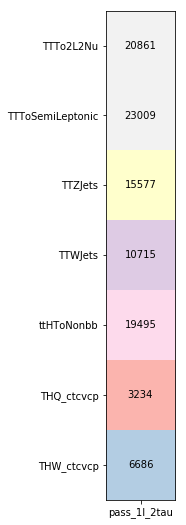

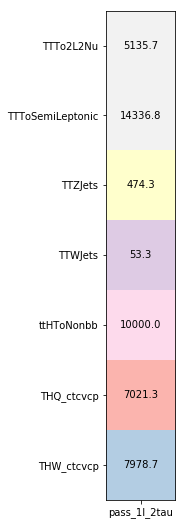

In [19]:
""" 
Do the tables of events and yields - check both loading and reweighting/class
"""
channelsDraw = []
for nn, nor in enumerate(norms) :
    channelsDraw += [channels[nn]]
    if not channels[nn] == CRs[nn] :
        channelsDraw += [CRs[nn]]
print (channelsDraw)
print ("Date: ", time.asctime( time.localtime(time.time()) ))
contamination = []
contaminationYields = []
for k, key in enumerate(keys) : 
    chann = []
    channYields = []
    for cc, channeld in enumerate(channelsDraw) : 
        chann = chann + [len(data.loc[(data['key']==key) & (data[channeld].values) & condition])]
        channYields = channYields + [data.loc[(data['key']==key) & (data[channeld].values) & condition, "weight_train_cat"].sum()]
    contamination = contamination + [ chann ]
    contaminationYields = contaminationYields + [ channYields ]
####
print ("UnWeighted table")
print ("Date: ", time.asctime( time.localtime(time.time()) ))
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
#fig.colorbar('viridis')
im = ax.imshow(contamination,  origin='lower', interpolation='None', cmap="Pastel1")
ax.set_yticks(np.arange(len(keys)))
ax.set_xticks(np.arange(len(channelsDraw)))
ax.set_xticklabels(channelsDraw) # 
ax.set_yticklabels(keys) # 
# Rotate the tick labels and set their alignment.
#grid(False)
plt.setp(ax.get_xticklabels(), rotation=0, ha="center", rotation_mode="anchor")
for (j,i),label in np.ndenumerate(contamination):
    ax.text(i,j, '{:0.0f}'.format(label),ha='center',va='center', color='k')
print ("ttH + tH 'categorories'")
###
print ("Weighted table")
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
#fig.colorbar('viridis')
im = ax.imshow(contamination,  origin='lower', interpolation='None', cmap="Pastel1")
ax.set_yticks(np.arange(len(keys)))
ax.set_xticks(np.arange(len(channelsDraw)))
ax.set_xticklabels(channelsDraw) # 
ax.set_yticklabels(keys) # 
# Rotate the tick labels and set their alignment.
#grid(False)
plt.setp(ax.get_xticklabels(), rotation=0, ha="center",
         rotation_mode="anchor")
for (j,i),label in np.ndenumerate(contaminationYields):
    ax.text(i,j, '{:0.1f}'.format(label),ha='center',va='center', color='k')
print ("ttH + tH 'categorories' yields")

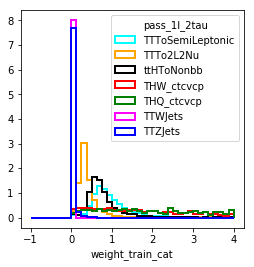

In [13]:
"""
another check of the reweighting - the sizes of the training weight
"""
fig, ax = plt.subplots(figsize=(4, 4))
if not channel == "3l_0tau" :
    keystodraw = [ 'TTToSemiLeptonic','TTTo2L2Nu', "ttHToNonbb", 'THW_ctcvcp', 'THQ_ctcvcp', 'TTWJets','TTZJets', ]
    colors = ['cyan','orange','k','r','green','magenta','b',]
else :
    keystodraw = [ 'TTTo2L2Nu', "ttHToNonbb", 'THW_ctcvcp', 'THQ_ctcvcp', 'TTWJets','TTZJets', ] #   
    colors = ['orange','k','r','green','magenta','b',]
vars = ["weight_train_cat"]#"multitarget"]

for kk, key in enumerate(keystodraw) :
  for vv, var in enumerate(vars) : 
    ax.hist(
        np.array(data.loc[(data['key']==key) & condition , var].values,dtype='float64'), # 
        weights=data.loc[(data['key']==key) & condition, "evtWeight"], # "weight_train_cat"
        range=(-1.0,4.),bins=40, histtype='step', normed=True, lw=2, color=colors[kk],
        label=key
    )
    ax.set_xlabel(var)

    if tHenrich : ax.legend(loc="best", title= channel+"\n(not tH-enlarged) ")
else : ax.legend(loc="best", title= channel)

In [21]:
## making more variables / changing the default of some variables
for string in ["jet1", "jet2", "jet3", "jet4", "lep1", "lep2", "lep3", "lep4", "tau1", "tau2", "jetForward1", "jetForward2"] :
    data[string+"_eta_sign"] = 0
    data[string+"_eta_abs"] = -1
    data.loc[(data[string+"_pt"] > 0), string+"_eta_sign"] = np.sign(data[string+"_eta"])
    data.loc[(data[string+"_pt"] > 0), string+"_eta_abs"] = np.abs(data[string+"_eta"])
    #
    data[string+"_phi_sign"] = 0
    data[string+"_phi_abs"] = -1
    data.loc[(data[string+"_pt"] > 0), string+"_phi_sign"] = np.sign(data[string+"_phi"])
    data.loc[(data[string+"_pt"] > 0), string+"_phi_abs"] = np.abs(data[string+"_phi"])
    #
    data.loc[(data[string+"_pt"] < 0), string+"_pt"] = 0
    data.loc[(data[string+"_pt"] < 0), string+"_mass"] = 0

for string in ["lep1", "lep2", "lep3", "lep4"] : data.loc[(data[string+"_pt"] < 0), string+"_conept"] = 0
data.loc[(data["mbb_medium"] < 0), "mbb_medium"] = 0

if channel == "2lss_0tau" or channel == "2lss_1tau" :
    data["max_lep_eta"]=data[["lep1_eta_abs", "lep2_eta_abs"]].max(axis=1)
    data["lep_min_dr_jet"]=data[["lep1_min_dr_jet", "lep2_min_dr_jet"]].max(axis=1)
if channel == "3l_0tau" :
    data["max_lep_eta"]=data[["lep1_eta_abs", "lep2_eta_abs", "lep3_eta_abs"]].max(axis=1)
    data["lep_min_dr_jet"]=data[["lep1_min_dr_jet", "lep2_min_dr_jet", "lep3_min_dr_jet"]].max(axis=1)
if channel == "1l_2tau" :
    data["max_tau_eta"]=data[["tau1_eta_abs", "tau2_eta_abs"]].max(axis=1)
    data["tau_min_dr_jet"]=data[["tau1_min_dr_jet", "tau2_min_dr_jet"]].max(axis=1)
    data["tau_minmin_dr_jet"]=data[["tau1_min_dr_jet", "tau2_min_dr_jet"]].min(axis=1)
    data["tau_min_dr_lep"]=data[["tau1_min_dr_lep", "tau2_min_dr_lep"]].max(axis=1)

print ("Date: ", time.asctime( time.localtime(time.time()) ))

('Date: ', 'Mon Apr 15 15:31:41 2019')


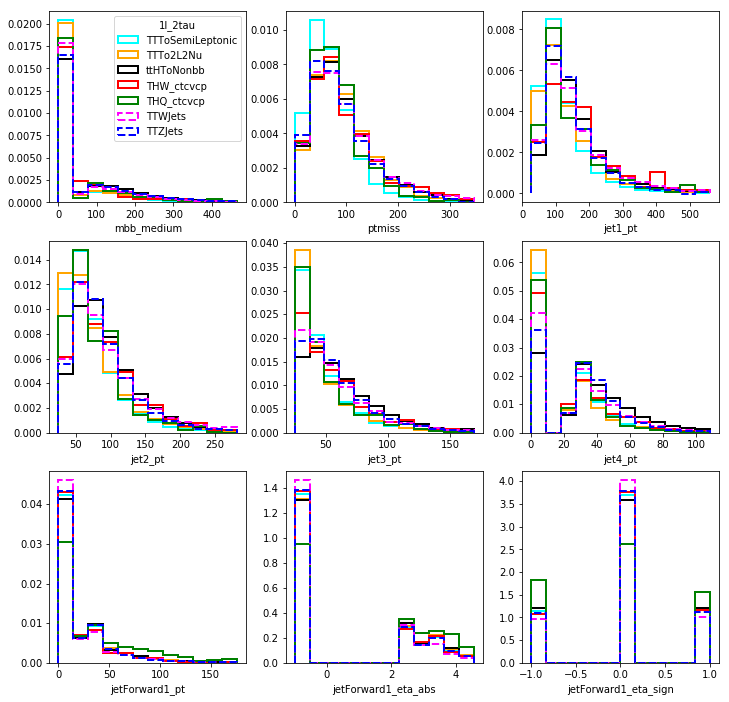

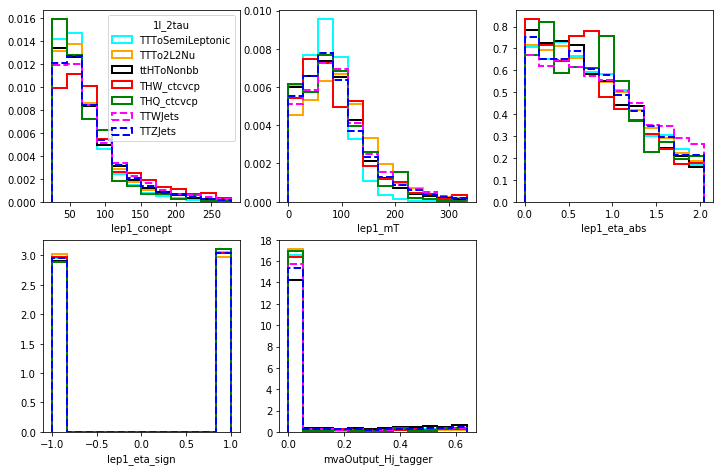

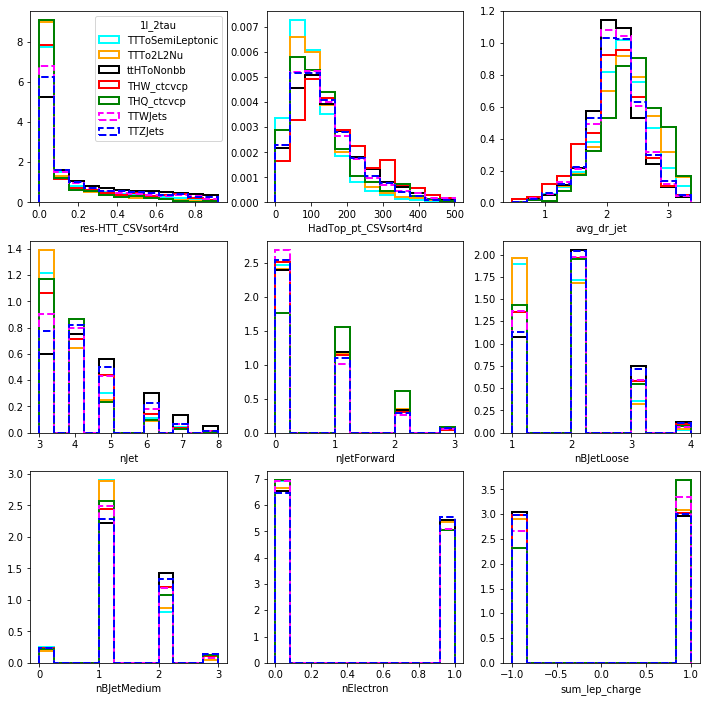

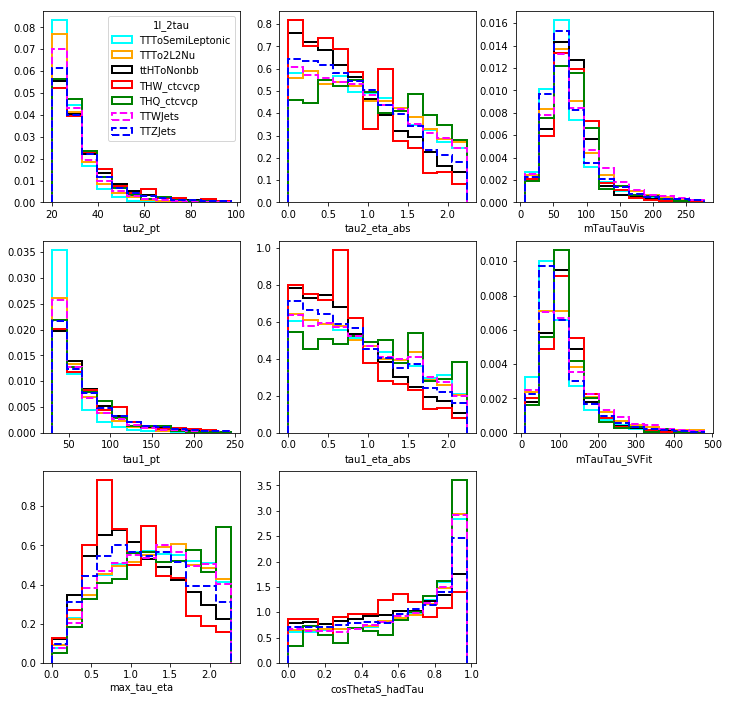

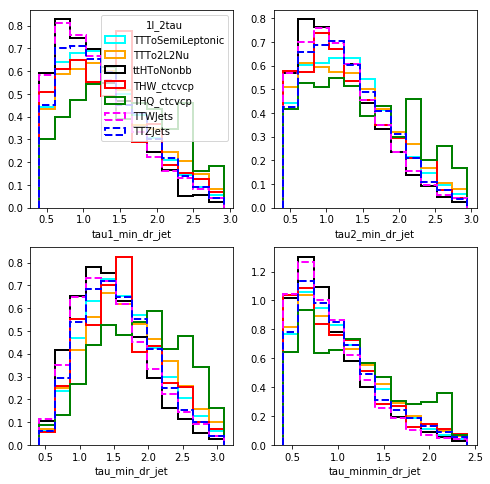

In [24]:
"""
Draw some plots on lists of variables
"""
if not channel == "3l_0tau" :
    keystodraw = [ 'TTToSemiLeptonic','TTTo2L2Nu', "ttHToNonbb", 'THW_ctcvcp', 'THQ_ctcvcp', 'TTWJets','TTZJets', ]
    colors = ['cyan','orange','k','r','green','magenta','b',]
else :
    keystodraw = [ 'TTTo2L2Nu', "ttHToNonbb", 'THW_ctcvcp', 'THQ_ctcvcp', 'TTWJets','TTZJets', ] #   
    colors = ['orange','k','r','green','magenta','b',]
    
## i try to do 3 X 3 plots (= enter up to nine entries in each sublist)
## try to add strictly decreasing variables as first in each sublist, better for the legend positioning
if channel == "2lss_0tau"  :
    listdraw = [
        ['mbb_medium', 'avg_dr_jet', 'ptmiss', 'jet1_pt', 'jet2_pt', 'jet3_pt','tau1_eta_abs', 'tau1_min_dr_jet','tau1_pt', ], 
        [ 'lep1_conept', 'lep1_mT','lep2_conept',  'lep2_mT',  'lep1_min_dr_jet', 'lep2_min_dr_jet', 'max_lep_eta', 'sum_lep_charge'],
        ['jetForward1_pt', 'jetForward1_eta_abs', 'res-HTT_CSVsort4rd', 'HadTop_pt_CSVsort4rd', 'nJet', 'nJetForward', 'nBJetLoose',]
    ]
if channel == "2lss_1tau" :
    listdraw = [
        ['ptmiss', 'mbb_medium', 'jet1_pt', 'jet2_pt', 'jet3_pt', 'jet4_pt', 'jetForward1_pt', 'jetForward1_eta_abs', 'jetForward1_eta_sign',], 
        ['lep1_mT', 'lep1_conept', 'lep2_mT', 'lep2_conept', "max_lep_eta","lep_min_dr_jet", "tau1_eta_abs",  "tau1_eta_sign", "tau1_pt",],
        [ "res-HTT_CSVsort4rd", 'HadTop_pt_CSVsort4rd', 'avg_dr_jet','nJet', 'nJetForward', 'nBJetLoose',"nBJetMedium", 'nElectron', 'sum_lep_charge'],
        ["HTT_semi_boosted_fromAK8", "HadTop_pt_semi_boosted_fromAK8","N_jetAK8","resolved_and_semi_AK8", "mvaOutput_Hj_tagger","tau1_min_dr_jet", "lep1_min_dr_jet","lep2_min_dr_jet", 'jetForward2_pt'],
    ]
if channel == "3l_0tau" :
    listdraw = [
        ['ptmiss', 'mbb_medium', 'jet1_pt', 'jet2_pt', 'jet3_pt', 'jet4_pt', 'jetForward1_pt', 'jetForward1_eta_abs', 'jetForward1_eta_sign',] ,
        ['lep1_mT', 'lep1_conept', 'lep2_mT', 'lep2_conept', 'lep3_mT', 'lep3_conept', 'avg_dr_jet', 'max_lep_eta', 'lep_min_dr_jet', ],
        ["res-HTT_CSVsort4rd", 'HadTop_pt_CSVsort4rd', 'nJet', 'nJetForward', 'nBJetLoose', 'nElectron', 'sum_lep_charge']
    ]
if channel == "1l_2tau" :
    listdraw = [
        ['mbb_medium', 'ptmiss', 'jet1_pt', 'jet2_pt', 'jet3_pt', 'jet4_pt', 'jetForward1_pt', 'jetForward1_eta_abs', 'jetForward1_eta_sign',], 
        ['lep1_conept','lep1_mT',  "lep1_eta_abs", "lep1_eta_sign", "mvaOutput_Hj_tagger",],
        [ "res-HTT_CSVsort4rd", 'HadTop_pt_CSVsort4rd', 'avg_dr_jet','nJet', 'nJetForward', 'nBJetLoose',"nBJetMedium", 'nElectron', 'sum_lep_charge'],
        #["HTT_semi_boosted_fromAK8", "HadTop_pt_semi_boosted_fromAK8","N_jetAK8","resolved_and_semi_AK8",],
        [ "tau2_pt",  "tau2_eta_abs", "mTauTauVis", "tau1_pt","tau1_eta_abs",  "mTauTau_SVFit", "max_tau_eta","cosThetaS_hadTau", ],
        [  "tau1_min_dr_jet", "tau2_min_dr_jet","tau_min_dr_jet", "tau_minmin_dr_jet",]
        #['ptmiss', 'mbb_medium', 'jet1_pt', 'jet2_pt', 'jet3_pt', 'jet4_pt', 'jetForward1_pt', 'jetForward1_eta_abs', 'jetForward1_eta_sign',], 
        #['lep1_mT', 'lep1_conept', "lep1_eta_abs", "lep1_eta_sign","max_tau_eta","tau_min_dr_jet", "tau_minmin_dr_jet"],
        #[ "res-HTT_CSVsort4rd", 'HadTop_pt_CSVsort4rd', 'avg_dr_jet','nJet', 'nJetForward', 'nBJetLoose',"nBJetMedium", 'nElectron', 'sum_lep_charge'],
        #["HTT_semi_boosted_fromAK8", "HadTop_pt_semi_boosted_fromAK8","N_jetAK8","resolved_and_semi_AK8", "mvaOutput_Hj_tagger",],
        #[ "tau1_eta_abs",  "tau1_eta_sign","tau2_pt",  "tau2_eta_abs","tau2_eta_sign", "mTauTauVis", "mTauTau_SVFit", "cosThetaS_hadTau","tau1_pt",],
        #[ "tau2_min_dr_lep","tau_min_dr_lep"]
    ]
if channel == "4L" :
    listdraw = [
        ['mbb_medium', 'jet1_pt', 'jet2_pt', 'jet3_pt', 'jet4_pt', 'lep1_mT', 'lep1_conept', 'tau1_pt', 'tau2_pt',] ,
        ['jetForward1_pt', 'jetForward1_eta_abs', 'jetForward1_eta_sign', 'ptmiss', 'mTauTauVis', 'mTauTau_SVFit', 'cosThetaS_hadTau','max_tau_eta','nBJetMedium',],  
        ['HadTop_pt_CSVsort4rd',"res-HTT_CSVsort4rd", 'nJet', 'nJetForward', 'nBJetLoose', "tau1_min_dr_jet","tau2_min_dr_jet", "lep1_min_dr_jet","avg_dr_jet", ]
    ]
    

for featuresDraw in listdraw:
    sizeArray=int(math.sqrt(len(featuresDraw))) if math.sqrt(len(featuresDraw)) % int(math.sqrt(len(featuresDraw))) == 0 else int(math.sqrt(len(featuresDraw)))+1
    plt.figure(figsize=(4*sizeArray,4*sizeArray))
    for n, feature in enumerate(featuresDraw) :
        min_value, max_value = np.percentile(data[feature], [0.0, 99])
        # fig, ax = plt.subplots(figsize=(4, 4))
        plt.subplot(sizeArray, sizeArray, n+1)
        for kk, key in enumerate(keystodraw) :
            if 'TTZJets' in key or 'TTWJets' in key : linestyle = "--"
            else :linestyle = "-"
            plt.hist(
            np.array(data.loc[(data['key']==key), feature].values,dtype='float64'), 
            weights=data.loc[(data['key']==key) , "evtWeight"], 
            range=(min_value, max_value), 
            bins=12, histtype='step', ls=linestyle, 
            normed=True, lw=2, color=colors[kk],
            label=key
            )
            plt.xlabel(feature)
        if n == 0 : plt.legend(loc="upper right", title= channel)

In [16]:
"""
Full list of variables to use on training 
--> all the avaiable variables are here, the idea is that you manualy comment/uncoment then if you do not have yet a frozen list (do not delete, so you have in mind what is there)
If you want to use the frozen list evaluate only the next cell
"""
frozenList = False
if not frozenList :
    trainvarsFix = [
        "avg_dr_jet", 
        "ptmiss",
        "mTauTauVis", "mTauTau_SVFit", #"cosThetaS_hadTau",
        #"mTauTauVis2", "mTauTau2_SVFit", "cosThetaS_hadTau2",
        #"mbb_loose",
        "mbb_medium",
        #"max_dr_jet", #"met_LD",
        "jet1_pt", #"jet1_eta_abs", "jet1_eta_sign", "jet1_phi_abs", "jet1_phi_sign",  "jet1_mass",
        "jet2_pt", #"jet2_eta_abs", "jet2_eta_sign", "jet2_phi_abs", "jet2_phi_sign",  "jet2_mass", 
        "jet3_pt", #"jet3_eta_abs", "jet3_eta_sign", "jet3_phi_abs", "jet3_phi_sign",  "jet3_mass", 
        "jet4_pt", #"jet4_eta_abs", "jet4_eta_sign", "jet4_phi_abs", "jet4_phi_sign", "jet4_mass", 
        #"max_lep_eta",
        #"lep_min_dr_jet",
        "lep1_mT", "lep1_conept", #"lep1_eta_abs", "lep1_eta_sign",#"lep1_min_dr_jet", #"lep1_mass", #  "lep1_phi_abs", "lep1_phi_sign",
        #"lep2_mT", "lep2_conept", #"lep2_min_dr_jet", #"lep2_mass", "lep2_eta_abs", "lep2_eta_sign", "lep2_phi_abs", "lep2_phi_sign",  
        #"lep3_mT", "lep3_conept", #"lep3_min_dr_jet", # "lep3_eta_abs", "lep3_eta_sign", "lep3_phi_abs", "lep3_phi_sign", "lep3_mass", # "lep3_pt",  
        #"lep4_conept", "lep4_mT", "lep4_min_dr_jet", "lep4_pt", "lep4_eta", "lep4_phi", "lep4_mass",
        #"tau1_min_dr_jet", "tau1_min_dr_lep", 
        #"tau1_pt",  "tau1_eta", #"tau1_phi", "tau1_mass",
        #"tau2_min_dr_jet", "tau2_min_dr_lep", 
        #"tau2_pt", # "tau2_eta", #"tau2_phi", "tau2_mass",
        "tau1_pt", #"tau1_eta_abs",  #"tau1_eta_sign",
        "tau1_min_dr_jet","tau2_min_dr_jet",
        "lep1_min_dr_jet", #"lep2_min_dr_jet",
        "tau2_pt",  #"tau2_eta_abs", #"tau2_eta_sign",
        "max_tau_eta",
        #"tau3_min_dr_jet", "tau3_min_dr_lep", "tau3_pt",  "tau3_eta", "tau3_phi", "tau3_mass",
        #"tau4_min_dr_jet", "tau4_min_dr_lep", "tau4_pt",  "tau4_eta", "tau4_phi", "tau4_mass",
        #"DijetForward_mass",
        "jetForward1_pt", "jetForward1_eta_abs", #"jetForward1_eta_sign", #"jetForward1_phi_abs", "jetForward1_phi_sign", "jetForward1_mass",
        #"jetForward2_pt", "jetForward2_eta", "jetForward2_phi", #"jetForward2_mass",
        #"res-HTT_CSVsort4rd",
        "HadTop_pt_CSVsort4rd",
        #"HTTv2_lead_pt", "minDR_HTTv2_lep", "minDR_HTTv2subjets_lep",
        #"HTT_boosted", "HadTop_pt_boosted",
        #"HTT_semi_boosted_fromAK8", 
        #"HadTop_pt_semi_boosted_fromAK8",
        #"minDR_AK8_lep", "minDR_AK8subjets_lep",
        "nJet", 
        "nJetForward",
        "nBJetLoose",
        #"nBJetMedium",
        #"nElectron",
        #"nLepton", #"nTau",
        #"isCharge_hadTau_OS",
        #"isCharge_Lepton_OS",
        #"sum_lep_charge", #"sum_tau_charge",
        #"pass_ttH",
        #"nHTTv2",
        #"N_jetAK8",
        #"resolved_and_semi_AK8", #"pass_ttWctrl" #"boosted_and_semi_AK8", "resolved_and_boosted",
        #"failsZbosonMassVeto",
        #"mvaOutput_Hj_tagger",
    ]
print ("Date: ", time.asctime( time.localtime(time.time()) ))

('Date: ', 'Thu Apr 11 18:11:41 2019')


In [25]:
frozenList = True

if channel == "2lss_0tau" :
    trainvarsFix = ['avg_dr_jet', 'ptmiss', 'mbb_medium', 'jet1_pt', 'jet2_pt', 'jet3_pt', 'jet4_pt', 'max_lep_eta', 'lep1_mT', 'lep1_conept', 'lep1_min_dr_jet', 'lep2_mT', 'lep2_conept', 'lep2_min_dr_jet', 'nJetForward', 'jetForward1_pt', 'jetForward1_eta_abs', 'res-HTT_CSVsort4rd', 'HadTop_pt_CSVsort4rd', 'nJet', 'nBJetLoose', 'nBJetMedium', 'nElectron', 'sum_lep_charge', 'mvaOutput_Hj_tagger']
if channel == "2lss_1tau" :
    trainvarsFix = ["do!"]
if channel == "3l_0tau" :
    trainvarsFix = ['avg_dr_jet', 'ptmiss', 'mbb_medium', 'jet1_pt', 'jet2_pt', 'jet3_pt', 'jet4_pt', 'max_lep_eta', 'lep1_mT', 'lep1_conept', 'lep2_mT', 'lep2_conept', 'lep3_mT', 'lep3_conept', 'jetForward1_pt', 'jetForward1_eta_abs', 'jetForward1_eta_sign', 'res-HTT_CSVsort4rd', 'HadTop_pt_CSVsort4rd', 'nJet', 'nJetForward', 'nBJetLoose', 'nElectron', 'sum_lep_charge']
if channel == "1l_2tau" :
    trainvarsFix = ['avg_dr_jet', 'ptmiss', 'mTauTauVis', 'mTauTau_SVFit', 'mbb_medium', 'jet1_pt', 'jet2_pt', 'jet3_pt', 'jet4_pt', 'lep1_mT', 'lep1_conept', 'tau1_pt', 'tau1_min_dr_jet', 'tau2_min_dr_jet', 'lep1_min_dr_jet', 'tau2_pt', 'max_tau_eta', 'jetForward1_pt', 'jetForward1_eta_abs', 'HadTop_pt_CSVsort4rd', 'nJet', 'nJetForward', 'nBJetLoose']
if channel == "4L" :
    trainvarsFix = ["do!"]

In [36]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler

In [37]:
### Multiclass structure - softmax activation
# sparse = I enter the classes a plain integer numbers (instead of many columns)
def nn_model():
    "create a model."
    model = Sequential()
    model.add(Dense(3*len(features), input_dim=len(features), kernel_initializer='he_uniform')) 
    model.add(BatchNormalization())
    model.add(PReLU())
    model.add(Dropout(0.01))
    for Nnodes in [32,16] :
        model.add(Dense(Nnodes, kernel_initializer='he_uniform'))
        model.add(BatchNormalization())
        model.add(PReLU())
        model.add(Dropout(0.01))
    model.add(Dense(ncat, activation='softmax'))
    model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=Nadam(lr=0.00008, schedule_decay=0.00001), # , beta_1 = 0.95, beta_2 = 0.999
    metrics=['accuracy'], 
    )
    return model 
print ("Date: ", time.asctime( time.localtime(time.time()) ))


('Date: ', 'Mon Apr 15 16:02:02 2019')


In [44]:
"""
Define the input and train!
"""
print (len(channels)) 
features = trainvarsFix
print (features)
print (len(features))
print ("Date: ", time.asctime( time.localtime(time.time()) ))


## If you want to remove one MC from training the bellow is the place -- check that you did the balancing to properlly account that removal 
if onlyTHq : toRemoveFromTraining = ['THQ', 'THW', 'THW_ctcvcp']
elif onlyTHW : toRemoveFromTraining = ['THQ', 'THW', 'THQ_ctcvcp']
else : toRemoveFromTraining = ['THQ', 'THW'] # remove only the low stat ones

## conditions to train on, safeguard in case you modified the loadind and loaded more than you should
condition = None
for cc, ch in enumerate(channels) :
    if condition == None : condition = (data[ch]==1)
    condition += (data[ch]==1)
    if not channels[cc] == CRs[cc] : condition += (data[CRs[cc]]==1)
if not tHenrich : condition += (data["pass_ttH"]==1)
        
data_use = data.loc[condition, features+[weights, 'target', 'key', 'multitarget', "weight_train_cat", "weight_cx"]+channels] #  (data["pass_0l_2tau"]==1) | (data["pass_2los_1tau"]==1) |  (data["pass_2l_2tau"]==1) | (data["pass_4l_0tau"]==1) | | (data["pass_3l_1tau"]==1) | (data["pass_1l_2tau"]==1) |  (data["pass_2lss_1tau"]==1) 
traindataset, valdataset = train_test_split(data_use.loc[~(data_use['key'].isin(toRemoveFromTraining))], test_size=0.2, random_state=7)
print ("Date: ", time.asctime( time.localtime(time.time()) ))

"""
there are more than one fit method, to calculate variables importance later on we need to be this method
"""
print ("Date: ", time.asctime( time.localtime(time.time()) ))
# Port Keras Framework into SK-Learn
# https://stackoverflow.com/questions/39467496/error-when-using-keras-sk-learn-api

### If you want to just continue a training already started comment the six lines bellow
k_model  = KerasClassifier(
    build_fn=nn_model, 
    epochs=25, 
    batch_size=256, 
    verbose=2
)

history = k_model.fit(
    traindataset[features].values, 
    traindataset['multitarget'].values,
    sample_weight=traindataset["weight_train_cat"].values,
    validation_data=(
        valdataset[features].values, 
        valdataset['multitarget'].values, 
        valdataset["weight_train_cat"].values
    )
)
print ("Date: ", time.asctime( time.localtime(time.time()) ))

1
['avg_dr_jet', 'ptmiss', 'mTauTauVis', 'mTauTau_SVFit', 'mbb_medium', 'jet1_pt', 'jet2_pt', 'jet3_pt', 'jet4_pt', 'lep1_mT', 'lep1_conept', 'tau1_pt', 'tau1_min_dr_jet', 'tau2_min_dr_jet', 'lep1_min_dr_jet', 'tau2_pt', 'max_tau_eta', 'jetForward1_pt', 'jetForward1_eta_abs', 'HadTop_pt_CSVsort4rd', 'nJet', 'nJetForward', 'nBJetLoose']
23
('Date: ', 'Mon Apr 15 16:23:19 2019')
('Date: ', 'Mon Apr 15 16:23:19 2019')
('Date: ', 'Mon Apr 15 16:23:19 2019')
Train on 79661 samples, validate on 19916 samples
Epoch 1/25
 - 4s - loss: 0.5627 - acc: 0.6653 - val_loss: 0.5230 - val_acc: 0.6682
Epoch 2/25
 - 3s - loss: 0.5209 - acc: 0.6594 - val_loss: 0.4996 - val_acc: 0.6613
Epoch 3/25
 - 3s - loss: 0.4983 - acc: 0.6514 - val_loss: 0.4845 - val_acc: 0.6535
Epoch 4/25
 - 3s - loss: 0.4863 - acc: 0.6388 - val_loss: 0.4763 - val_acc: 0.6446
Epoch 5/25
 - 3s - loss: 0.4746 - acc: 0.6273 - val_loss: 0.4707 - val_acc: 0.6297
Epoch 6/25
 - 3s - loss: 0.4695 - acc: 0.6124 - val_loss: 0.4662 - val_acc: 0

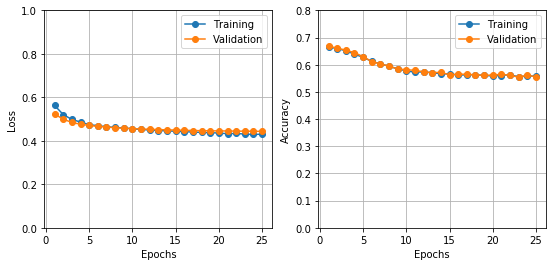

In [45]:
"""
overtraining test
"""
# Extract number of run epochs from the training history
epochs = range(1, len(history.history["loss"])+1)
plt.figure(figsize=(9, 4))
#fig = plt.figure(figsize=(4, 4))
plt.subplot(1, 2, 1)
# Extract loss on training and validation dataset and plot them together
plt.plot(epochs, history.history["loss"], "o-", label="Training")
plt.plot(epochs, history.history["val_loss"], "o-", label="Validation")
plt.xlabel("Epochs"), plt.ylabel("Loss")
#plt.yscale("log")
#plt.xlim(0,40)
plt.ylim(0.0,1.0)
plt.grid()
plt.legend();

plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(4, 4))
# Extract loss on training and validation dataset and plot them together
plt.plot(epochs, history.history["acc"], "o-", label="Training")
plt.plot(epochs, history.history["val_acc"], "o-", label="Validation")
plt.xlabel("Epochs"), plt.ylabel("Accuracy")
#plt.yscale("log")
plt.ylim(0.0,0.8)
plt.grid()
plt.legend(loc="best");

plt.show()

In [46]:
"""
Calculate the output in all dataset 
-- Some of the test distributions are done with all data due stats issues on validation part
-- the real overtraining test is done in the last cell
"""

print ("Date: ", time.asctime( time.localtime(time.time()) ))
for mm, mult in enumerate(categoriesMultitarget) : 
    data_use[mult]  = k_model.predict_proba(data_use[features].values, verbose=0)[:,mm]
print ("Date: ", time.asctime( time.localtime(time.time()) ))

### Separate the data by category
data_use["category"]     = data_use[categoriesMultitarget].idxmax(axis=1)
data_use["category_max"] = data_use[categoriesMultitarget].max(axis=1)

## The bellow is to calculate roc only on the ttH and tH region itself
## the random state is the same - the division is going to be the same
data_use["target_tH"] = data_use['key'].isin(['THW_ctcvcp', 'THQ_ctcvcp'])
traindataset, valdataset = train_test_split(data_use, test_size=0.2, random_state=7)

('Date: ', 'Mon Apr 15 16:24:50 2019')
('Date: ', 'Mon Apr 15 16:24:53 2019')


In [76]:
import eli5
from eli5.sklearn import PermutationImportance
"""
to calculate variables importance, it takes time and it is not completelly 'enlightant',
do not do all the time.
"""

In [196]:
print ("Date: ", time.asctime( time.localtime(time.time()) ))
perm = PermutationImportance(k_model, random_state=1).fit( # , scoring="f1_samples"
    traindataset[features].values, 
    traindataset['multitarget'].values,
    sample_weight=traindataset["weight_train_cat"].values
)
print ("Date: ", time.asctime( time.localtime(time.time()) ))
eli5.show_weights(perm, feature_names = traindataset[features].columns.tolist(), top=len(features))

('Date: ', 'Wed Apr 10 17:41:47 2019')
('Date: ', 'Wed Apr 10 17:44:10 2019')


Weight,Feature
0.0611 ± 0.0011,HadTop_pt_CSVsort4rd
0.0274 ± 0.0020,tau1_pt
0.0173 ± 0.0017,jet4_pt
0.0129 ± 0.0010,jet1_pt
0.0123 ± 0.0019,jet2_pt
0.0114 ± 0.0015,jet3_pt
0.0075 ± 0.0010,mbb_medium
0.0074 ± 0.0010,ptmiss
0.0020 ± 0.0007,tau2_pt
0.0018 ± 0.0007,jetForward1_pt


In [ ]:
print ("Date: ", time.asctime( time.localtime(time.time()) ))
perm = PermutationImportance(k_model, random_state=1).fit(
    traindataset.loc[ (traindataset["category"] == "predictions_tH") , features].values, 
    traindataset.loc[ (traindataset["category"] == "predictions_tH") , 'multitarget'].values,
    sample_weight=traindataset.loc[ (traindataset["category"] == "predictions_tH") ,"weight_train_cat"].values
)
print ("Date: ", time.asctime( time.localtime(time.time()) ))
eli5.show_weights(perm, feature_names = traindataset[features].columns.tolist(), top=len(features))

In [ ]:
print ("Date: ", time.asctime( time.localtime(time.time()) ))#traindataset
perm = PermutationImportance(k_model, random_state=1).fit(
    traindataset.loc[ (traindataset["category"] == "predictions_ttH") , features].values, 
    traindataset.loc[ (traindataset["category"] == "predictions_ttH") , 'multitarget'].values,
    sample_weight=traindataset.loc[ (traindataset["category"] == "predictions_ttH") ,"weight_train_cat"].values
)
print ("Date: ", time.asctime( time.localtime(time.time()) ))
eli5.show_weights(perm, feature_names = traindataset[features].columns.tolist(), top=len(features))

In [155]:
print ("Date: ", time.asctime( time.localtime(time.time()) ))#traindataset
perm = PermutationImportance(k_model, random_state=1).fit(
    traindataset.loc[ (traindataset["category"] == "predictions_rest") , features].values, 
    traindataset.loc[ (traindataset["category"] == "predictions_rest") , 'multitarget'].values,
    sample_weight=traindataset.loc[ (traindataset["category"] == "predictions_rest") ,"weight_train_cat"].values
)
print ("Date: ", time.asctime( time.localtime(time.time()) ))
eli5.show_weights(perm, feature_names = traindataset[features].columns.tolist(), top=len(features))

('Date: ', 'Thu Apr 11 17:20:28 2019')
('Date: ', 'Thu Apr 11 17:21:11 2019')


Weight,Feature
0.0987 ± 0.0012,mTauTau_SVFit
0.0820 ± 0.0020,lep1_mT
0.0813 ± 0.0009,jet1_pt
0.0804 ± 0.0025,ptmiss
0.0756 ± 0.0015,mTauTauVis
0.0650 ± 0.0020,lep1_conept
0.0645 ± 0.0013,HadTop_pt_CSVsort4rd
0.0596 ± 0.0030,jetForward1_pt
0.0585 ± 0.0013,tau1_pt
0.0427 ± 0.0018,jet4_pt


/home/acaan/.local/lib/python2.7/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
/home/acaan/.local/lib/python2.7/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)


XGBoost train set auc - 0.588473598174
XGBoost test set auc - 0.561350953164


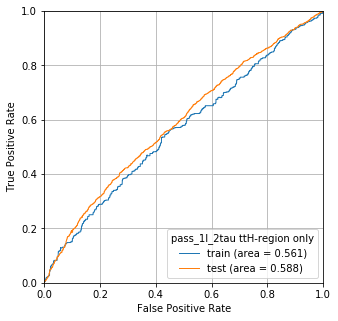

In [47]:
#### roc only on the ttH region itself
for nn, nor in enumerate(norms) :
    valhere = valdataset.loc[(valdataset[channels[nn]]==1) | (valdataset[CRs[nn]]==1)]
    trainhere = traindataset.loc[(traindataset[channels[nn]]==1) | (traindataset[CRs[nn]]==1)]

    fpr, tpr, _= roc_curve(
        trainhere.loc[(trainhere["category"].values == "predictions_ttH"), "target"].values.astype('int'),
        trainhere.loc[(trainhere["category"].values == "predictions_ttH"), "category_max"].values.astype('float'),
        sample_weight=trainhere.loc[(trainhere["category"].values == "predictions_ttH"), weights].astype(np.float64)
    )
    train_auc = auc(fpr, tpr, reorder = True)
    print("XGBoost train set auc - {}".format(train_auc))
    fprt, tprt, _= roc_curve(
        valhere.loc[(valhere["category"].values == "predictions_ttH"), "target"].values.astype('int'),
        valhere.loc[(valhere["category"].values == "predictions_ttH"), "category_max"].values.astype('float'),
        sample_weight=valhere.loc[(valhere["category"].values == "predictions_ttH"), weights].astype(np.float64)
    )
    test_auct = auc(fprt, tprt, reorder = True)
    print("XGBoost test set auc - {}".format(test_auct))
    fig, ax = plt.subplots(figsize=(5, 5))
    ## ROC curve
    ax.grid()
    #ax.plot(fpr, tpr, lw=1, label='train (area = %0.3f)'%(train_auc))
    #ax.plot(fprt, tprt, lw=1, label='test (area = %0.3f)'%(test_auct))
    ax.plot(fprt, tprt, lw=1, label='train (area = %0.3f)'%(test_auct))
    ax.plot(fpr, tpr, lw=1, label='test (area = %0.3f)'%(train_auc))
    ax.set_ylim([0.0,1.0])
    ax.set_xlim([0.0,1.0])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right", title=channels[nn]+" ttH-region only")

XGBoost train set auc - 0.63566600137
XGBoost test set auc - 0.538036485572


/home/acaan/.local/lib/python2.7/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
/home/acaan/.local/lib/python2.7/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)


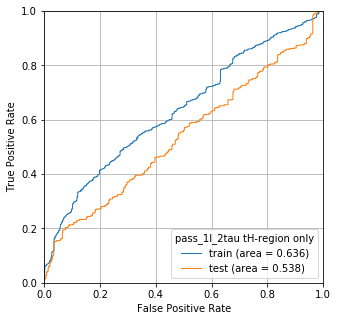

In [48]:
#### roc only on the ttH region itself
for nn, nor in enumerate(norms) :
    valhere = valdataset.loc[(valdataset[channels[nn]]==1) | (valdataset[CRs[nn]]==1)]
    trainhere = traindataset.loc[(traindataset[channels[nn]]==1) | (traindataset[CRs[nn]]==1)]

    fpr, tpr, _= roc_curve(
        trainhere.loc[(trainhere["category"].values == "predictions_tH"), "target_tH"].values.astype('int'),
        trainhere.loc[(trainhere["category"].values == "predictions_tH"), "category_max"].values.astype('float'),
        sample_weight=trainhere.loc[(trainhere["category"].values == "predictions_tH"), weights].astype(np.float64)
    )
    train_auc = auc(fpr, tpr, reorder = True)
    print("XGBoost train set auc - {}".format(train_auc))
    fprt, tprt, _= roc_curve(
        valhere.loc[(valhere["category"].values == "predictions_tH"), "target_tH"].values.astype('int'),
        valhere.loc[(valhere["category"].values == "predictions_tH"), "category_max"].values.astype('float'),
        sample_weight=valhere.loc[(valhere["category"].values == "predictions_tH"), weights].astype(np.float64)
    )
    test_auct = auc(fprt, tprt, reorder = True)
    print("XGBoost test set auc - {}".format(test_auct))
    fig, ax = plt.subplots(figsize=(5, 5))
    ## ROC curve
    ax.grid()
    ax.plot(fpr, tpr, lw=1, label='train (area = %0.3f)'%(train_auc))
    ax.plot(fprt, tprt, lw=1, label='test (area = %0.3f)'%(test_auct))
    #ax.plot(fprt, tprt, lw=1, label='train (area = %0.3f)'%(test_auct))
    #ax.plot(fpr, tpr, lw=1, label='test (area = %0.3f)'%(train_auc))
    ax.set_ylim([0.0,1.0])
    ax.set_xlim([0.0,1.0])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right", title=channels[nn]+" tH-region only")

(8.57, 274.25998, 0.75, 6.68, 0.2200000286102295, 0.25)


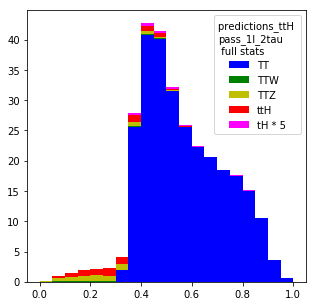

(8.57, 274.25998, 0.75, 6.68, 0.2200000286102295, 0.25)


<Figure size 432x288 with 0 Axes>

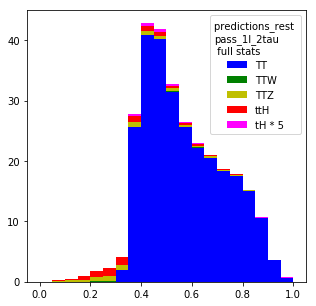

(8.57, 274.25998, 0.75, 6.68, 0.2200000286102295, 0.25)


<Figure size 432x288 with 0 Axes>

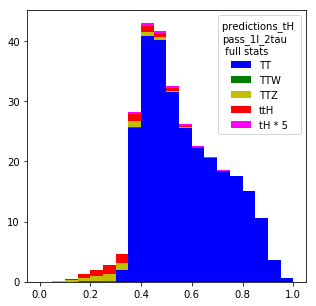

<Figure size 432x288 with 0 Axes>

In [49]:
"""
Draw the distributions without separate categories 
-- it helps to check cross section normalization -- no need to run always
"""
for nn, nor in enumerate(norms) :
    weights_sig_be_sig = []
    weights_bkgTT_be_sig = []
    weights_bkgTHq_be_sig = []
    weights_bkgTHw_be_sig = []
    weights_bkgTTW_be_sig = []
    weights_bkgTTZ_be_sig = []
    y_pred_sig_be_sig = []
    y_pred_bkgTT_be_sig = []
    y_pred_bkgTHq_be_sig = []
    y_pred_bkgTHw_be_sig = []
    y_pred_bkgTTW_be_sig = []
    y_pred_bkgTTZ_be_sig = []
    #if nn > 0 : continue
    for cc, category in enumerate(categoriesMultitarget) : # , "predictions_tH"
        y_pred_sig_be_sig    = y_pred_sig_be_sig + [data_use.loc[(data["target"]==1) & ((data_use[channels[nn]].values)  | (data_use[CRs[nn]]==1)), category].values]
        y_pred_bkgTT_be_sig  = y_pred_bkgTT_be_sig + [data_use.loc[(data['key'].isin(['TTTo2L2Nu','TTToSemiLeptonic', 'TTToHadronic'])) & ((data_use[channels[nn]].values)  | (data_use[CRs[nn]]==1)), "category_max"].values]
        y_pred_bkgTHq_be_sig  = y_pred_bkgTHq_be_sig + [data_use.loc[(data['key'].isin([ 'THQ_ctcvcp'])) & ((data_use[channels[nn]].values)  | (data_use[CRs[nn]]==1)), "category_max"].values]
        y_pred_bkgTHw_be_sig  = y_pred_bkgTHw_be_sig + [data_use.loc[(data['key'].isin(['THW_ctcvcp'])) & ((data_use[channels[nn]].values)  | (data_use[CRs[nn]]==1)), "category_max"].values]
        y_pred_bkgTTW_be_sig = y_pred_bkgTTW_be_sig + [data_use.loc[(data['key']=='TTWJets') & ((data_use[channels[nn]].values)  | (data_use[CRs[nn]]==1)), category].values]
        y_pred_bkgTTZ_be_sig = y_pred_bkgTTZ_be_sig + [data_use.loc[(data['key']=='TTZJets') & ((data_use[channels[nn]].values)  | (data_use[CRs[nn]]==1)), category].values]

        weights_sig_be_sig = weights_sig_be_sig + [(data_use.loc[(data_use["target"]==1) & ((data_use[channels[nn]].values)  | (data_use[CRs[nn]]==1)), "weight_cx"].values)]
        weights_bkgTT_be_sig = weights_bkgTT_be_sig + [(data_use.loc[(data_use['key'].isin(['TTTo2L2Nu','TTToSemiLeptonic', 'TTToHadronic'])) & ((data_use[channels[nn]].values)  | (data_use[CRs[nn]]==1)), "weight_cx"].values)]
        weights_bkgTHq_be_sig = weights_bkgTHq_be_sig + [5*(data_use.loc[(data_use['key'].isin([ 'THQ_ctcvcp'])) & ((data_use[channels[nn]].values)  | (data_use[CRs[nn]]==1)), "weight_cx"].values)]
        weights_bkgTHw_be_sig = weights_bkgTHw_be_sig + [5*(data_use.loc[(data_use['key'].isin(['THW_ctcvcp'])) & ((data_use[channels[nn]].values)  | (data_use[CRs[nn]]==1)), "weight_cx"].values)]
        weights_bkgTTW_be_sig = weights_bkgTTW_be_sig + [(data_use.loc[(data_use['key']=='TTWJets') & ((data_use[channels[nn]].values)  | (data_use[CRs[nn]]==1)), "weight_cx"].values)]
        weights_bkgTTZ_be_sig = weights_bkgTTZ_be_sig + [(data_use.loc[(data_use['key']=='TTZJets') & ((data_use[channels[nn]].values)  | (data_use[CRs[nn]]==1)), "weight_cx"].values)]

        print (weights_sig_be_sig[cc].sum(), weights_bkgTT_be_sig[cc].sum(), weights_bkgTTW_be_sig[cc].sum(), weights_bkgTTZ_be_sig[cc].sum(), weights_bkgTHq_be_sig[cc].sum()/5., weights_bkgTHw_be_sig[cc].sum()/5.)
        if (weights_sig_be_sig[cc].sum()+ weights_bkgTT_be_sig[cc].sum()+ weights_bkgTTW_be_sig[cc].sum()+ weights_bkgTTZ_be_sig[cc].sum() > 0) :
            plt.figure('XGB',figsize=(5, 5))
            plt.hist(
                [
                    y_pred_bkgTT_be_sig[cc], 
                    y_pred_bkgTTW_be_sig[cc], 
                    y_pred_bkgTTZ_be_sig[cc], 
                    y_pred_sig_be_sig[cc],
                    y_pred_bkgTHq_be_sig[cc],
                    y_pred_bkgTHw_be_sig[cc]
                ] , 
                weights=[
                    weights_bkgTT_be_sig[cc], 
                    weights_bkgTTW_be_sig[cc],
                    weights_bkgTTZ_be_sig[cc],
                    weights_sig_be_sig[cc],
                    weights_bkgTHq_be_sig[cc],
                    weights_bkgTHw_be_sig[cc]
                ],
                label=[
                    "TT",
                    "TTW",
                    "TTZ",
                    "ttH",
                    "tH * 5"
                ], histtype='bar', 
                color=[
                    'b',
                    'g',
                    'y',
                    'r',
                    'magenta',
                    'magenta'
                ],  stacked=True, range=(0,1), bins=20)
            #plt.xscale('log')
            #plt.yscale('log')
            plt.legend(loc='best', title=category+" \n"+channels[nn]+"\n full stats")
            #grid(False)
            plt.show()
            plt.clf()

(2.4694998, 20.843494, 0.1212582, 1.3787923, 0.118431956, 0.17160606)


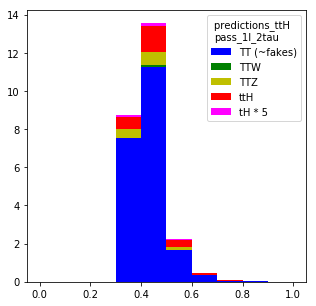

(3.3559723, 207.63542, 0.40314713, 3.2961822, 0.5005746, 0.4085558)


<Figure size 432x288 with 0 Axes>

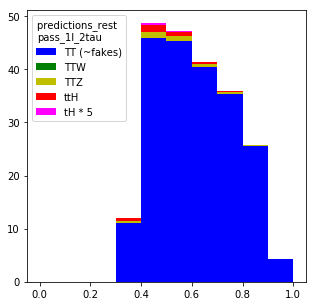

(2.7445278, 45.781105, 0.22559467, 2.0050254, 0.48099348, 0.6698382)


<Figure size 432x288 with 0 Axes>

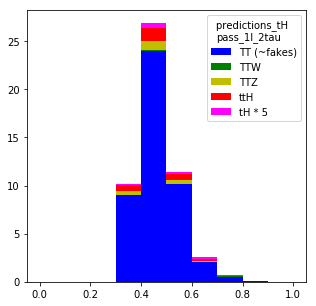

predictions_ttH
('weights_sig_be_sig', 2.4694998)
('weights_bkgTT_be_sig', 20.843494)
('weights_bkgTTW_be_sig', 0.1212582)
('weights_bkgTTZ_be_sig', 1.3787923)
('weights_bkgTHq_be_sig', 0.118431956)
predictions_rest
('weights_sig_be_sig', 3.3559723)
('weights_bkgTT_be_sig', 207.63542)
('weights_bkgTTW_be_sig', 0.40314713)
('weights_bkgTTZ_be_sig', 3.2961822)
('weights_bkgTHq_be_sig', 0.5005746)
predictions_tH
('weights_sig_be_sig', 2.7445278)
('weights_bkgTT_be_sig', 45.781105)
('weights_bkgTTW_be_sig', 0.22559467)
('weights_bkgTTZ_be_sig', 2.0050254)
('weights_bkgTHq_be_sig', 0.48099348)

('sum_TT', 274.2600212097168, 274.26, 274.26)
('sum_TTZ', 6.679999828338623, 6.68, 6.68)
('sum_TTW', 0.75, 0.75, 0.75)
('sum_TTH', 8.569999933242798, 8.57, 8.57)
('sum_TTH', 0.2200000047683716, 0.22, 0.22, 0.44)
('sum_TTH', 0.25000001192092897, 0.25, 0.25, 0.5)



<Figure size 432x288 with 0 Axes>

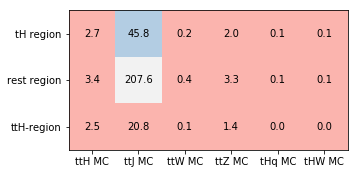

<Figure size 432x288 with 0 Axes>

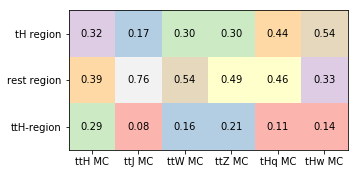

<Figure size 432x288 with 0 Axes>

In [50]:
for nn, nor in enumerate(norms) :
    weights_sig_be_sig = []
    weights_bkgTT_be_sig = []
    weights_bkgTHq_be_sig = []
    weights_bkgTHw_be_sig = []
    weights_bkgTTW_be_sig = []
    weights_bkgTTZ_be_sig = []
    y_pred_sig_be_sig = []
    y_pred_bkgTT_be_sig = []
    y_pred_bkgTHq_be_sig = []
    y_pred_bkgTHw_be_sig = []
    y_pred_bkgTTW_be_sig = []
    y_pred_bkgTTZ_be_sig = []
    #if nn > 0 : continue
    for cc, category in enumerate(categoriesMultitarget) : # 
        y_pred_sig_be_sig    = y_pred_sig_be_sig + [data_use.loc[(data_use["target"]==1) & (data_use["category"].values == category)  & ((data_use[channels[nn]].values)  | (data_use[CRs[nn]]==1)), "category_max"].values]
        y_pred_bkgTT_be_sig  = y_pred_bkgTT_be_sig + [data_use.loc[(data_use['key'].isin(['TTTo2L2Nu','TTToSemiLeptonic', 'TTToHadronic'])) & (data_use["category"].values == category)  & ((data_use[channels[nn]].values)  | (data_use[CRs[nn]]==1)), "category_max"].values]
        y_pred_bkgTHq_be_sig  = y_pred_bkgTHq_be_sig + [data_use.loc[(data_use['key'].isin([ 'THQ_ctcvcp'])) & (data_use["category"].values == category) & ((data_use[channels[nn]].values) | (data_use[CRs[nn]]==1)), "category_max"].values]
        y_pred_bkgTHw_be_sig  = y_pred_bkgTHw_be_sig + [data_use.loc[(data_use['key'].isin(['THW_ctcvcp'])) & (data_use["category"].values == category) & ((data_use[channels[nn]].values) | (data_use[CRs[nn]]==1)), "category_max"].values]
        y_pred_bkgTTW_be_sig = y_pred_bkgTTW_be_sig + [data_use.loc[(data_use['key']=='TTWJets') & (data_use["category"].values == category)  & ((data_use[channels[nn]].values)  | (data_use[CRs[nn]]==1)), "category_max"].values]
        y_pred_bkgTTZ_be_sig = y_pred_bkgTTZ_be_sig + [data_use.loc[(data_use['key']=='TTZJets') & (data_use["category"].values == category)  & ((data_use[channels[nn]].values)  | (data_use[CRs[nn]]==1)), "category_max"].values]

        weights_sig_be_sig = weights_sig_be_sig + [(data_use.loc[(data_use["target"]==1) & (data_use["category"].values == category)  & ((data_use[channels[nn]].values)  | (data_use[CRs[nn]]==1)), "weight_cx"].values)]
        weights_bkgTT_be_sig = weights_bkgTT_be_sig + [(data_use.loc[(data_use['key'].isin(['TTTo2L2Nu','TTToSemiLeptonic', 'TTToHadronic'])) & (data_use["category"].values == category)  & ((data_use[channels[nn]].values)  | (data_use[CRs[nn]]==1)), "weight_cx"].values)]
        weights_bkgTHq_be_sig = weights_bkgTHq_be_sig + [5*(data_use.loc[(data_use['key'].isin(['THQ_ctcvcp'])) & (data_use["category"].values == category) & ((data_use[channels[nn]].values)  | (data_use[CRs[nn]]==1)), "weight_cx"].values)]
        weights_bkgTHw_be_sig = weights_bkgTHw_be_sig + [5*(data_use.loc[(data_use['key'].isin(['THW_ctcvcp'])) & (data_use["category"].values == category) & ((data_use[channels[nn]].values)  | (data_use[CRs[nn]]==1)), "weight_cx"].values)]
        weights_bkgTTW_be_sig = weights_bkgTTW_be_sig + [(data_use.loc[(data_use['key']=='TTWJets') & (data_use["category"].values == category) & ((data_use[channels[nn]].values)  | (data_use[CRs[nn]]==1)), "weight_cx"].values)]
        weights_bkgTTZ_be_sig = weights_bkgTTZ_be_sig + [(data_use.loc[(data_use['key']=='TTZJets') & (data_use["category"].values == category) & ((data_use[channels[nn]].values)  | (data_use[CRs[nn]]==1)), "weight_cx"].values)]

        print (weights_sig_be_sig[cc].sum(), weights_bkgTT_be_sig[cc].sum(), weights_bkgTTW_be_sig[cc].sum(), weights_bkgTTZ_be_sig[cc].sum(), weights_bkgTHq_be_sig[cc].sum(), weights_bkgTHw_be_sig[cc].sum())
        if (weights_sig_be_sig[cc].sum()+ weights_bkgTT_be_sig[cc].sum()+ weights_bkgTTW_be_sig[cc].sum()+ weights_bkgTTZ_be_sig[cc].sum() > 0) :
            plt.figure('XGB',figsize=(5, 5))
            plt.hist(
                [
                    y_pred_bkgTT_be_sig[cc], 
                    y_pred_bkgTTW_be_sig[cc], 
                    y_pred_bkgTTZ_be_sig[cc], 
                    y_pred_sig_be_sig[cc],
                    y_pred_bkgTHq_be_sig[cc],
                    y_pred_bkgTHw_be_sig[cc]
                ] , 
                weights=[
                    weights_bkgTT_be_sig[cc], 
                    weights_bkgTTW_be_sig[cc],
                    weights_bkgTTZ_be_sig[cc],
                    weights_sig_be_sig[cc],
                    weights_bkgTHq_be_sig[cc],
                    weights_bkgTHw_be_sig[cc]
                ],
                label=[
                    "TT (~fakes)",
                    "TTW",
                    "TTZ",
                    "ttH",
                    "tH * 5"
                ], histtype='bar', 
                color=[
                    'b',
                    'g',
                    'y',
                    'r',
                    "magenta",
                    "magenta"
                ],  stacked=True, range=(0,1), bins=10)
            #plt.xscale('log')
            #plt.yscale('log')
            plt.legend(loc='best', title=category+" \n"+channels[nn])
            #grid(False)
            plt.show()
            plt.clf()
            #####
    """
    fig = plt.figure(figsize=(4, 4))
    for cc, category in enumerate(["predictions_ttH" ]) : # ,"predictions_ttJ","predictions_ttV"
        #y_pred_sig_be_sig    = y_pred_sig_be_sig + [data.loc[(data.target.values == 1) & (data["category"].values == category) & ((data[channels[nn]].values)  | (data[CRs[nn]]==1)), "category_max"].values]
        #y_pred_bkgTT_be_sig  = y_pred_bkgTT_be_sig + [data.loc[((data['key']=='TTTo2L2Nu') | (data['key']=='TTToSemiLeptonic') )& (data["category"].values == category) & ((data[channels[nn]].values)  | (data[CRs[nn]]==1)), "category_max"].values]
        #y_pred_bkgTTW_be_sig = y_pred_bkgTTW_be_sig + [data.loc[(data['key']=='TTWJets') & (data["category"].values == category) & ((data[channels[nn]].values)  | (data[CRs[nn]]==1)), "category_max"].values]
        #y_pred_bkgTTZ_be_sig = y_pred_bkgTTZ_be_sig + [data.loc[(data['key']=='TTZJets') & (data["category"].values == category) & ((data[channels[nn]].values)  | (data[CRs[nn]]==1)), "category_max"].values]

        #weights_sig_be_sig = weights_sig_be_sig + [(data.loc[(data.target.values == 1) & (data["category"].values == category) & ((data[channels[nn]].values)  | (data[CRs[nn]]==1)), "weight_cx"].values)]
        #weights_bkgTT_be_sig = weights_bkgTT_be_sig + [(data.loc[((data['key']=='TTTo2L2Nu') | (data['key']=='TTToSemiLeptonic')) & (data["category"].values == category) & ((data[channels[nn]].values)  | (data[CRs[nn]]==1)), "weight_cx"].values)]
        #weights_bkgTTW_be_sig = weights_bkgTTW_be_sig + [(data.loc[(data['key']=='TTWJets') & (data["category"].values == category) & ((data[channels[nn]].values)  | (data[CRs[nn]]==1)), "weight_cx"].values)]
        #weights_bkgTTZ_be_sig = weights_bkgTTZ_be_sig + [(data.loc[(data['key']=='TTZJets') & (data["category"].values == category) & ((data[channels[nn]].values)  | (data[CRs[nn]]==1)), "weight_cx"].values)]

        print (weights_sig_be_sig[cc].sum(), weights_bkgTT_be_sig[cc].sum(), weights_bkgTTW_be_sig[cc].sum(), weights_bkgTTZ_be_sig[cc].sum())
        plt.figure('XGB',figsize=(5, 5))
        n_bkg, bins_bkg, patches = plt.hist(
            [
               np.concatenate( 
                (y_pred_bkgTT_be_sig[cc], 
                y_pred_bkgTTW_be_sig[cc], 
                y_pred_bkgTTZ_be_sig[cc])
                             , axis=None) 
                #y_pred_sig_be_sig[cc]
            ] , 
            weights=[
                np.concatenate(
                (weights_bkgTT_be_sig[cc], 
                weights_bkgTTW_be_sig[cc],
                weights_bkgTTZ_be_sig[cc])
                              , axis=None)
                #weights_sig_be_sig[cc]
            ], histtype='bar',
            range=(0,1), bins=10)
        n_sig, bins_sig, patches = plt.hist(
            [
                y_pred_sig_be_sig[cc]
            ] , 
            weights=[
                weights_sig_be_sig[cc]
            ],
            label=[
                "ttH_be_sig"
            ],  
            color=[
                'r'
            ],  stacked=True, histtype='step', ls='--', range=(0,1), bins=10)
        plt.show()
        plt.clf()
        plt.figure('XGB',figsize=(5, 5))
        #bins_sig.delete(0.)
        bins_sig =  np.delete(bins_sig, np.where(bins_sig == 0.), axis=0) 
        print ("bins_sig", bins_sig)
        print ("n_bkg", n_bkg)
        print ("n_bkg", n_sig)
        print ((n_sig/np.square(n_bkg)))
        plt.xlim(0., 1.)
        plt.ylim(0.0001, 20.0)
        plt.plot(bins_sig, (n_sig/np.square(n_bkg)), 'ro')
        #plt.ylim(0., 1.)
        #plt.xlim(0.0001, 0.1)
        #plt.xscale('log')
        plt.yscale('log')
        #grid(True)
        plt.legend(loc='best', title=category+" \n"+channels[nn])
        plt.show()
        plt.clf()
    #"""
    ##########
    sum_TT = 0.
    sum_THq = 0.
    sum_THw = 0.
    sum_TTH = 0.
    sum_TTW = 0.
    sum_TTZ = 0.
    contamination = []
    for cc, category in enumerate(categoriesMultitarget) : # 
        sum_TT  = sum_TT  + weights_bkgTT_be_sig[cc].sum()
        sum_TTH = sum_TTH + weights_sig_be_sig[cc].sum()
        sum_THq  = sum_THq  + weights_bkgTHq_be_sig[cc].sum()
        sum_THw  = sum_THw  + weights_bkgTHw_be_sig[cc].sum()
        sum_TTW = sum_TTW + weights_bkgTTW_be_sig[cc].sum()
        sum_TTZ = sum_TTZ + weights_bkgTTZ_be_sig[cc].sum()
        contamination = contamination + [ 
            [weights_sig_be_sig[cc].sum(), 
            weights_bkgTT_be_sig[cc].sum(),
            weights_bkgTTW_be_sig[cc].sum(),
            weights_bkgTTZ_be_sig[cc].sum(),
            weights_bkgTHq_be_sig[cc].sum()/5.,
             weights_bkgTHw_be_sig[cc].sum()/5.
            ]
        ]
        print (category)
        print ("weights_sig_be_sig",  weights_sig_be_sig[cc].sum())
        print ("weights_bkgTT_be_sig", weights_bkgTT_be_sig[cc].sum())
        print ("weights_bkgTTW_be_sig", weights_bkgTTW_be_sig[cc].sum())
        print ("weights_bkgTTZ_be_sig", weights_bkgTTZ_be_sig[cc].sum())
        print ("weights_bkgTHq_be_sig", weights_bkgTHq_be_sig[cc].sum())
    print ("")
    print ("sum_TT", sum_TT, norms[nn][3], normsCRs[nn][3])
    print ("sum_TTZ", sum_TTZ, norms[nn][2], normsCRs[nn][2])
    print ("sum_TTW", sum_TTW, norms[nn][1], normsCRs[nn][1])
    print ("sum_TTH", sum_TTH, norms[nn][0], normsCRs[nn][0])
    print ("sum_TTH", sum_THq/5., norms[nn][4], normsCRs[nn][4],  norms[nn][4]+ normsCRs[nn][4])
    print ("sum_TTH", sum_THw/5., norms[nn][5], normsCRs[nn][5], norms[nn][5]+ normsCRs[nn][5])
    ################
    contaminationPer = []
    for cc, category in enumerate(categoriesMultitarget) : # 
        contaminationPer = contaminationPer + [ 
            [weights_sig_be_sig[cc].sum()/sum_TTH, 
            weights_bkgTT_be_sig[cc].sum()/sum_TT,
            weights_bkgTTW_be_sig[cc].sum()/sum_TTW,
            weights_bkgTTZ_be_sig[cc].sum()/sum_TTZ,
            (weights_bkgTHq_be_sig[cc].sum()/sum_THq),
             (weights_bkgTHw_be_sig[cc].sum()/sum_THw)
            ]
        ]
    print ("")
    ################
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    #fig.colorbar('viridis')
    im = ax.imshow(contamination,  origin='lower', interpolation='None', cmap="Pastel1")
    ax.set_xticks(np.arange(6))
    ax.set_yticks(np.arange(len(regionsMultitarget)))
    ax.set_yticklabels(regionsMultitarget) # 
    ax.set_xticklabels(["ttH MC",    "ttJ MC",     "ttW MC",    "ttZ MC", "tHq MC", "tHW MC"]) # 
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center",
             rotation_mode="anchor")
    for (j,i),label in np.ndenumerate(contamination):
        ax.text(i,j, '{:0.1f}'.format(label),ha='center',va='center', color='k')
    #grid(False)
    plt.show()
    plt.clf()
    ################
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    #fig.colorbar('viridis')
    im = ax.imshow(contaminationPer,  origin='lower', interpolation='None', cmap="Pastel1")
    ax.set_xticks(np.arange(6))
    ax.set_yticks(np.arange(len(regionsMultitarget)))
    ax.set_yticklabels(regionsMultitarget) # , "tH region" 
    ax.set_xticklabels(["ttH MC",    "ttJ MC",     "ttW MC",    "ttZ MC", "tHq MC", "tHw MC"]) # 
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center",
             rotation_mode="anchor")
    for (j,i),label in np.ndenumerate(contaminationPer):
        ax.text(i,j, '{:0.2f}'.format(label),ha='center',va='center', color='k')
    #grid(False)
    plt.show()
    plt.clf()

In [55]:
"""
output a training and export to .pb (to be used on cpp)
"""
print ("Date: ", time.asctime( time.localtime(time.time()) ))
nameout = "model_erase" #"model_1l_2tau_ttH_tH_3cat_noTHQenrich_v8"

out = k_model.model.save("test_"+nameout+".hdf5")
file = open(nameout+"_variables.log","w")
file.write(str(features)+"\n")
file.close()
file = open(nameout+"_classes.log","w")
file.write(str(categoriesMultitarget)+"\n")
file.close()

## This bellow does not work, easier to be done on the command line,
## in any case the bellow is a template how to run it
##!python ../test/convert_hdf5_2_pb.py --input "test_"+nameout+".hdf5" --output "test_"+nameout+".pb"

('Date: ', 'Mon Apr 15 16:33:53 2019')


In [ ]:
"""
If you want to load a model to reconpute anything or check loading just substitute k_model --> k_model_loaded
It only loads hdf5 format
"""
from keras.models import load_model
k_model_loaded = load_model("test_model_2lss_ttH_3cat_no4mom_noSemi_v6.hdf5")

In [ ]:
## the next do correlation matrices with variables

In [27]:
import seaborn 

multitarget =0
multitarget =1
multitarget =2


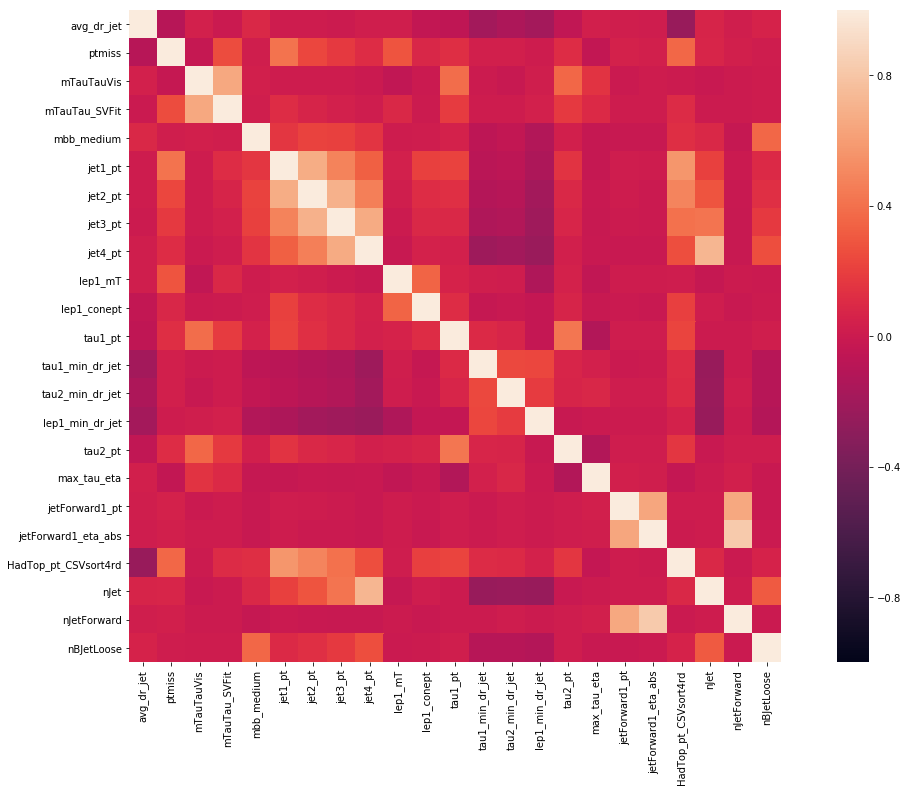

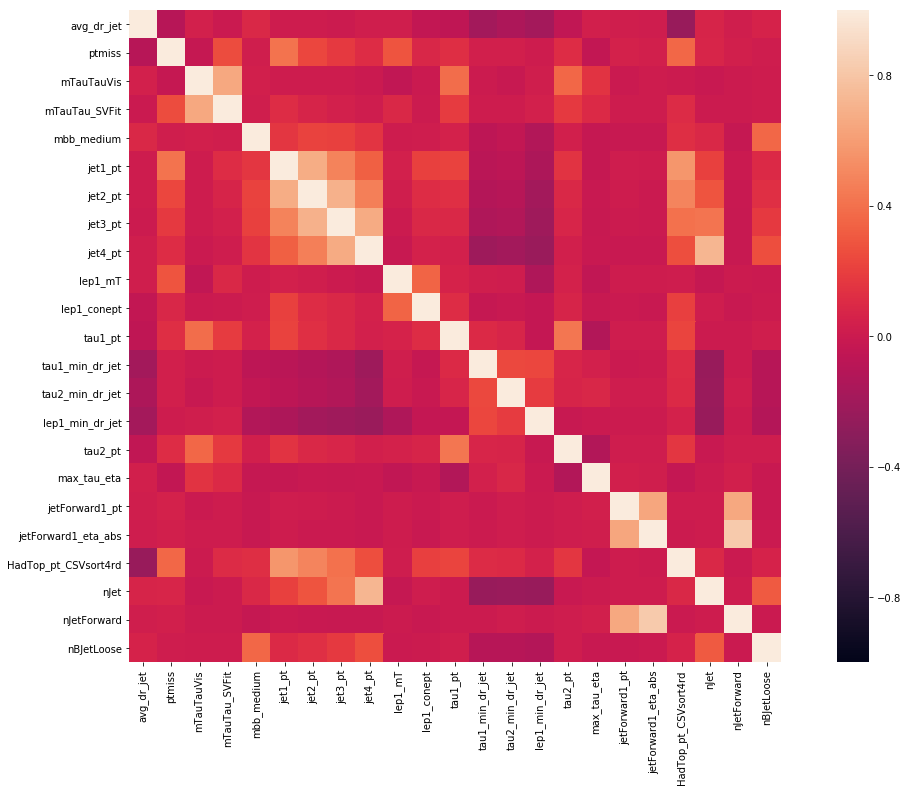

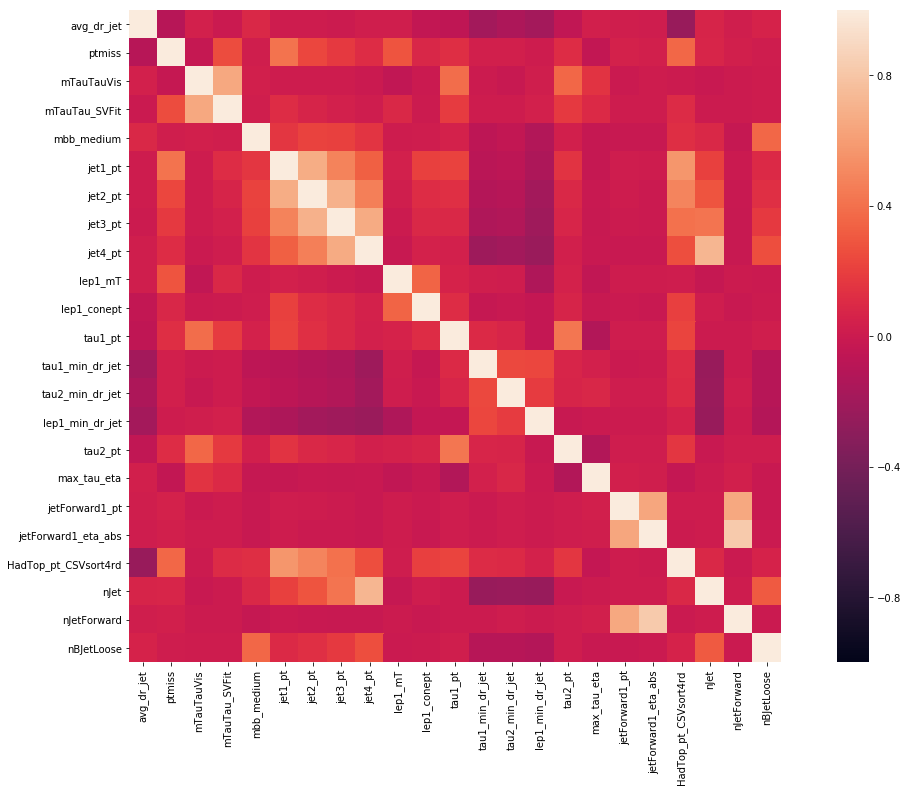

In [32]:
for multitarget in range(0,ncat) :
    print ("multitarget ="+str(multitarget))
    corr_mat = data.loc[(data['multitarget']==0), features].astype(float).corr() #
    fig, ax = plt.subplots(figsize=(20, 12)) 
    seaborn.heatmap(corr_mat, square=True, ax=ax, vmin=-1., vmax=1.);

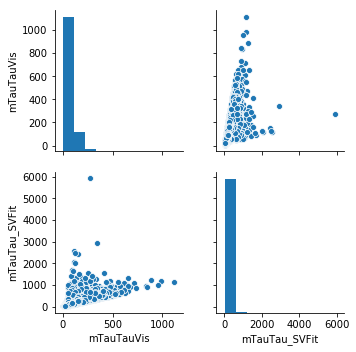

In [33]:
# you can also do pair plots
seaborn.pairplot(data.loc[(data['multitarget']==1) & (data["pass_1l_2tau"]==1), ["mTauTauVis", "mTauTau_SVFit"]])